<a href="https://colab.research.google.com/github/OmdenaAI/omdena-france-pollution/blob/main/EDA_France_Pollution_Mouad_Riali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from plotly.subplots import make_subplots 
import plotly.graph_objects as go 

In [ ]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Panel
from bokeh.models.widgets import Tabs
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
cities = ['Montpellier', 'Metz']
path = 'drive/MyDrive/Data/Air_Quality_Open_Data_Platform/France/france_air_quality_data_merged.csv'

In [ ]:
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206337 entries, 0 to 206336
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      206337 non-null  object 
 1   City      206337 non-null  object 
 2   Specie    206337 non-null  object 
 3   count     206337 non-null  int64  
 4   min       206337 non-null  float64
 5   max       206337 non-null  float64
 6   median    206337 non-null  float64
 7   variance  206337 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 12.6+ MB


In [ ]:
df.describe()

,count,min,max,median,variance
count,206337.000000,206337.000000,206337.000000,206337.000000,2.063370e+05
mean,100.978113,112.330446,133.476828,120.589395,7.953949e+02
std,73.383431,302.179397,299.145473,301.024274,1.879221e+04
min,2.000000,-46.000000,-11.000000,-43.000000,0.000000e+00
25%,48.000000,1.000000,11.800000,5.300000,2.364000e+01
50%,72.000000,5.500000,27.000000,13.800000,1.265800e+02
75%,127.000000,18.900000,65.000000,35.000000,5.697200e+02
max,432.000000,1050.200000,1079.500000,1076.800000,2.528350e+06


In [ ]:
pip install pivottablejs

In [ ]:
from pivottablejs import pivot_ui
from IPython.display import HTML 
pivot_ui(df, outfile_path='pivottablejs.html')
HTML('pivottablejs.html')

In [ ]:
df.head()

,Date,City,Specie,count,min,max,median,variance
0,2019-07-01,Nantes,wind speed,72,0.5,4.3,3.0,13.74
1,2019-07-01,Orléans,dew,72,11.5,15.0,13.0,8.87
2,2019-07-01,Nantes,co,45,0.1,0.1,0.1,0.00
3,2019-07-01,Rennes,temperature,48,13.7,21.0,16.5,58.59
4,2019-07-01,Nantes,dew,66,10.0,14.5,12.0,9.99


In [ ]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206337 entries, 0 to 206336
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      206337 non-null  datetime64[ns]
 1   City      206337 non-null  object        
 2   Specie    206337 non-null  object        
 3   count     206337 non-null  int64         
 4   min       206337 non-null  float64       
 5   max       206337 non-null  float64       
 6   median    206337 non-null  float64       
 7   variance  206337 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 12.6+ MB


In [ ]:
df = df.loc[df['City'].isin(cities)]
df.head()

,Date,City,Specie,count,min,max,median,variance
24,2019-07-01,Metz,so2,41,0.1,1.4,0.1,1.70
36,2019-07-01,Montpellier,wind gust,82,0.2,15.2,8.7,159.50
63,2019-07-01,Montpellier,humidity,96,48.0,94.0,72.0,1968.48
70,2019-07-01,Montpellier,o3,75,18.1,59.8,30.8,746.43
74,2019-07-01,Montpellier,pm25,96,47.0,92.0,60.0,1211.84


## Montpellier

In [ ]:
df_Mon = df.loc[df['City']=='Montpellier']
df_Mon

,Date,City,Specie,count,min,max,median,variance
36,2019-07-01,Montpellier,wind gust,82,0.2,15.2,8.7,159.50
63,2019-07-01,Montpellier,humidity,96,48.0,94.0,72.0,1968.48
70,2019-07-01,Montpellier,o3,75,18.1,59.8,30.8,746.43
74,2019-07-01,Montpellier,pm25,96,47.0,92.0,60.0,1211.84
87,2019-07-01,Montpellier,pm10,96,20.0,41.0,26.0,338.28
...,...,...,...,...,...,...,...,...
206227,2021-07-27,Montpellier,o3,20,26.6,40.0,34.4,117.12
206261,2021-07-27,Montpellier,pm25,21,10.0,19.0,13.0,105.91
206277,2021-07-27,Montpellier,pm10,21,8.0,17.0,12.0,85.90
206283,2021-07-27,Montpellier,temperature,36,19.5,26.5,23.0,54.86


In [ ]:
fig = px.pie(df_Mon, values='count', names='Specie', title='Count of Species - Montpellier')
fig.show()

In [ ]:
#df_Mon03 = df_Mon.loc[df_Mon['Specie']=='o3']

In [ ]:
#@title
pip install dash

SyntaxError: ignored

In [ ]:
species = df_Mon['Specie'].values
np.unique(species)

array(['dew', 'humidity', 'no2', 'o3', 'pm10', 'pm25', 'precipitation',
       'pressure', 'temperature', 'wind gust', 'wind speed'], dtype=object)

In [ ]:
species = np.unique(species)
for specie in species :
#specie = 'pressure'
    df_MonWind = df_Mon.loc[df_Mon['Specie']== specie]

    fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Minimum values", "Maximum Value", "Variance", "Median")) 
    fig.add_trace( go.Scatter(x=df_MonWind['Date'],y=df_MonWind['min'], name="Minimum values of "+specie ), row=1, col=1) 
    fig.add_trace( go.Scatter(x=df_MonWind['Date'],y=df_MonWind['max'],name="Maximum values of "+specie), row=1, col=2 ) 
    fig.add_trace( go.Scatter(x=df_MonWind['Date'],y=df_MonWind['variance'],name="Variance of "+specie+" Values" ), row=2, col=1 ) 
    fig.add_trace( go.Scatter(x=df_MonWind['Date'],y=df_MonWind['median'],name="Median of "+specie+" values" ), row=2, col=2 ) 

    #fig.update_xaxes(title_text="minimum value", row=1, col=1)
    fig.update_layout(height=600, width=1200, title_text=specie+" Over Time - Montpellier") 

    fig.show() 

In [ ]:
df_Mon

,Date,City,Specie,count,min,max,median,variance
36,2019-07-01,Montpellier,wind gust,82,0.2,15.2,8.7,159.50
63,2019-07-01,Montpellier,humidity,96,48.0,94.0,72.0,1968.48
70,2019-07-01,Montpellier,o3,75,18.1,59.8,30.8,746.43
74,2019-07-01,Montpellier,pm25,96,47.0,92.0,60.0,1211.84
87,2019-07-01,Montpellier,pm10,96,20.0,41.0,26.0,338.28
...,...,...,...,...,...,...,...,...
206227,2021-07-27,Montpellier,o3,20,26.6,40.0,34.4,117.12
206261,2021-07-27,Montpellier,pm25,21,10.0,19.0,13.0,105.91
206277,2021-07-27,Montpellier,pm10,21,8.0,17.0,12.0,85.90
206283,2021-07-27,Montpellier,temperature,36,19.5,26.5,23.0,54.86


In [ ]:
df_Mon['avg'] = (df_Mon['max']+df['min'])/ 2
df_Mon

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,City,Specie,count,min,max,median,variance,avg
36,2019-07-01,Montpellier,wind gust,82,0.2,15.2,8.7,159.50,7.70
63,2019-07-01,Montpellier,humidity,96,48.0,94.0,72.0,1968.48,71.00
70,2019-07-01,Montpellier,o3,75,18.1,59.8,30.8,746.43,38.95
74,2019-07-01,Montpellier,pm25,96,47.0,92.0,60.0,1211.84,69.50
87,2019-07-01,Montpellier,pm10,96,20.0,41.0,26.0,338.28,30.50
...,...,...,...,...,...,...,...,...,...
206227,2021-07-27,Montpellier,o3,20,26.6,40.0,34.4,117.12,33.30
206261,2021-07-27,Montpellier,pm25,21,10.0,19.0,13.0,105.91,14.50
206277,2021-07-27,Montpellier,pm10,21,8.0,17.0,12.0,85.90,12.50
206283,2021-07-27,Montpellier,temperature,36,19.5,26.5,23.0,54.86,23.00


In [ ]:

def data_merged(col,df=df_Mon):
  df = pd.DataFrame(data ={'Date':df_Mon['Date']})
  species = df_Mon['Specie'].values
  species= np.unique(species)
  for specie in species:
    df[specie]=df_Mon.loc[df_Mon['Specie']==specie][col]
  return df.groupby(['Date']).sum()


In [ ]:
df_merg_max = data_merged('max')
df_merg_min = data_merged('min')
df_merg_median = data_merged('median')
df_merg_avg = data_merged('avg')

In [ ]:
df_merg_max

,dew,humidity,no2,o3,pm10,pm25,precipitation,pressure,temperature,wind gust,wind speed
Date,,,,,,,,,,,
2019-07-01,24.0,94.0,27.1,59.8,41.0,92.0,0.0,1018.0,30.0,15.2,5.2
2019-07-02,24.0,83.2,29.0,73.9,38.0,77.0,0.0,1016.3,32.5,15.0,5.4
2019-07-03,21.5,86.0,20.8,82.6,24.0,62.0,0.0,1015.1,32.0,12.5,5.9
2019-07-04,22.0,86.2,23.2,84.9,27.0,64.0,0.0,1016.2,32.0,13.7,5.9
2019-07-05,23.0,95.0,25.7,69.8,30.0,75.0,0.0,1017.0,31.0,13.5,6.1
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23,22.5,97.0,21.3,51.0,68.0,63.0,0.0,1015.0,28.0,0.0,9.2
2021-07-24,22.5,94.0,13.0,41.8,62.0,71.0,0.0,1011.0,27.0,0.0,6.9
2021-07-25,14.0,58.0,8.0,35.3,24.0,53.0,0.0,1010.0,32.0,0.0,7.2


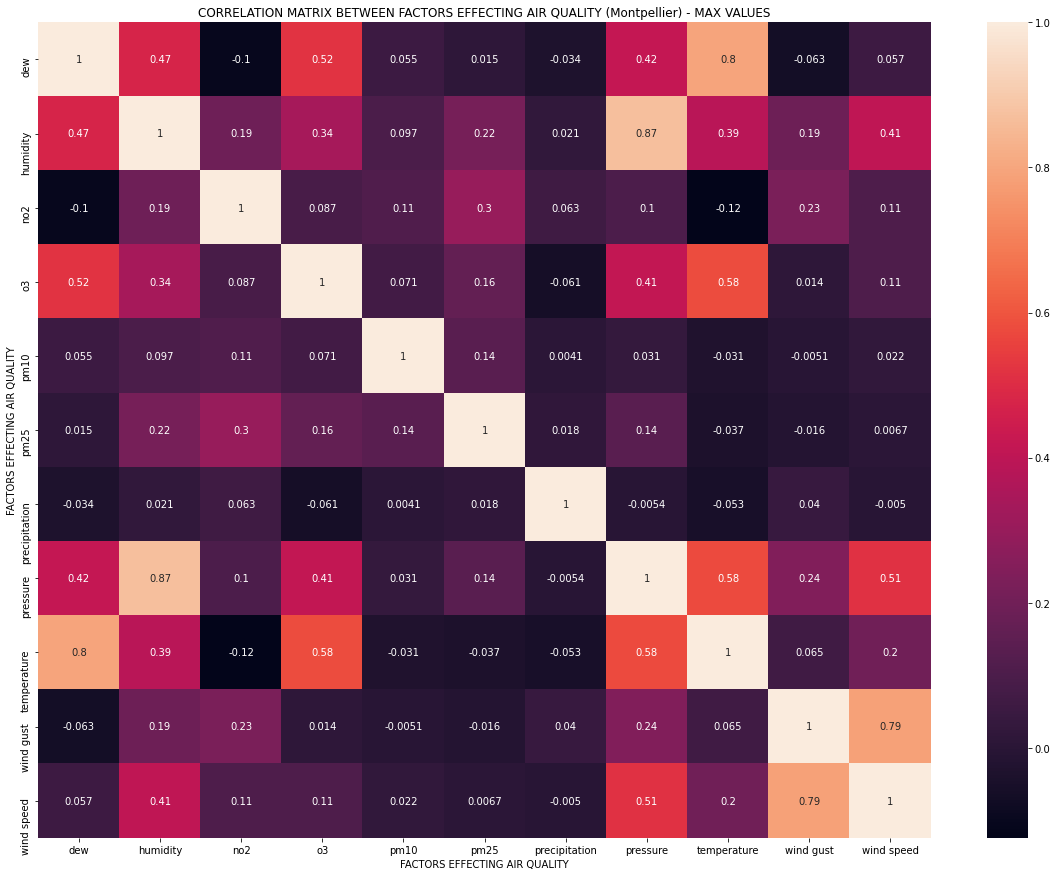

In [ ]:
correlation_matrix=df_merg_max.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_matrix,annot=True)
plt.title("CORRELATION MATRIX BETWEEN FACTORS EFFECTING AIR QUALITY (Montpellier) - MAX VALUES")
plt.xlabel("FACTORS EFFECTING AIR QUALITY")
plt.ylabel("FACTORS EFFECTING AIR QUALITY")
plt.show()

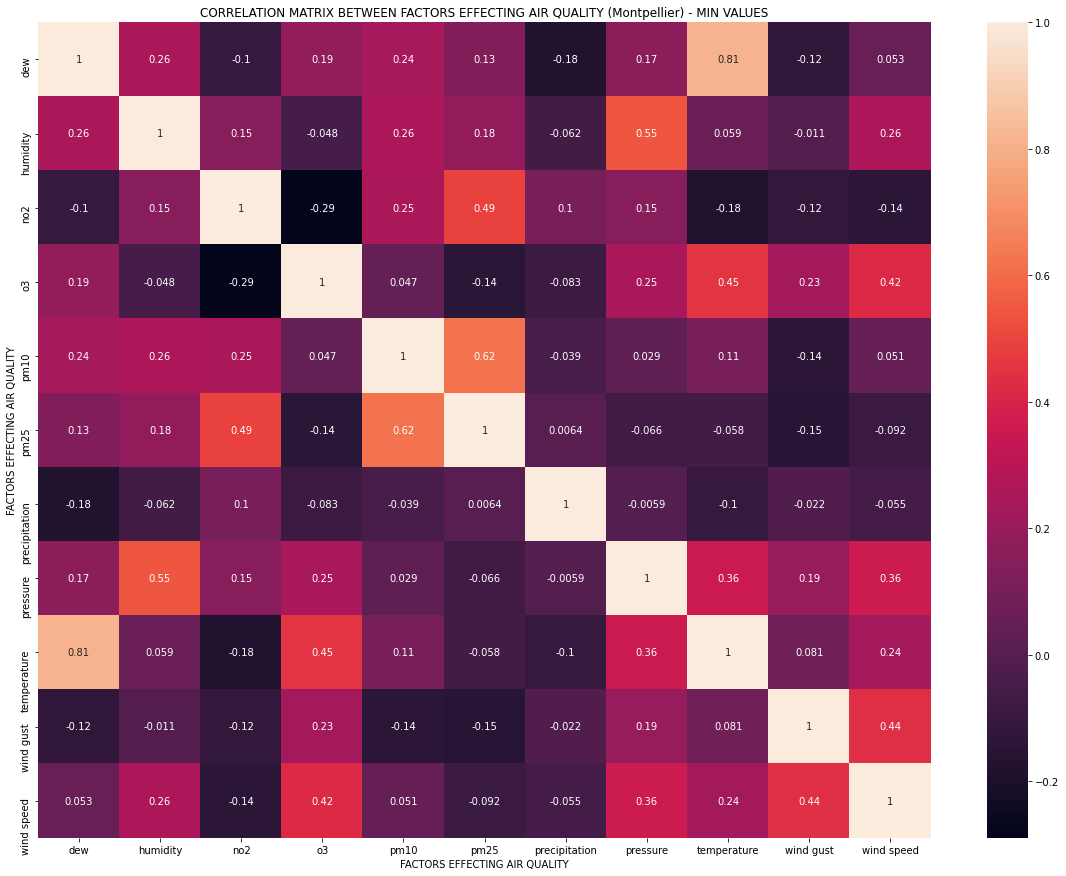

In [ ]:
correlation_matrix=df_merg_min.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_matrix,annot=True)
plt.title("CORRELATION MATRIX BETWEEN FACTORS EFFECTING AIR QUALITY (Montpellier) - MIN VALUES")
plt.xlabel("FACTORS EFFECTING AIR QUALITY")
plt.ylabel("FACTORS EFFECTING AIR QUALITY")
plt.show()

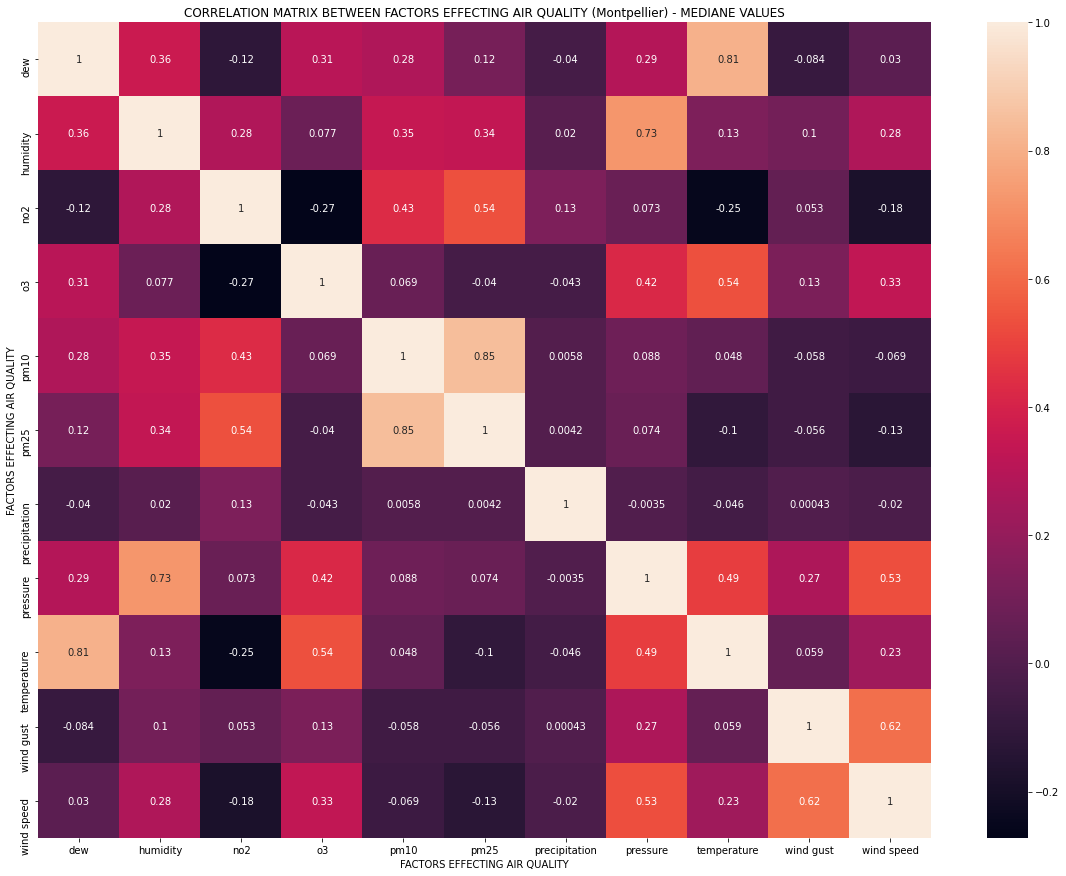

In [ ]:
correlation_matrix=df_merg_median.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_matrix,annot=True)
plt.title("CORRELATION MATRIX BETWEEN FACTORS EFFECTING AIR QUALITY (Montpellier) - MEDIANE VALUES")
plt.xlabel("FACTORS EFFECTING AIR QUALITY")
plt.ylabel("FACTORS EFFECTING AIR QUALITY")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



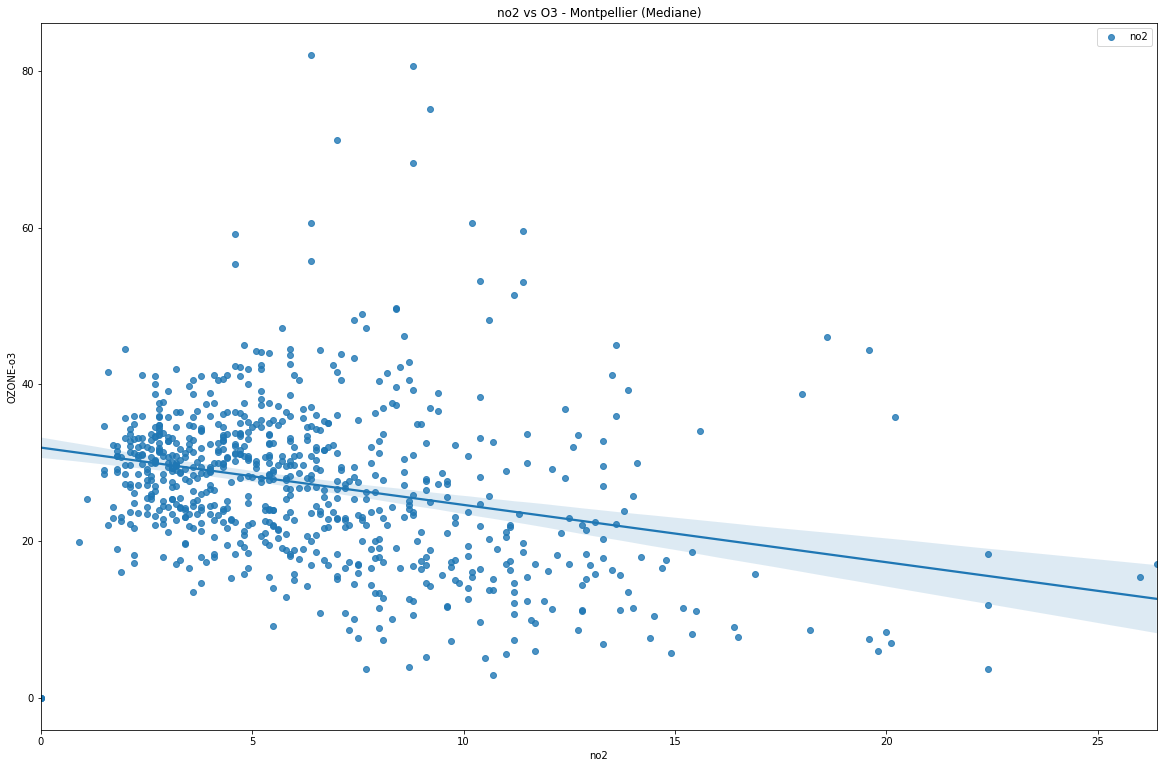

In [ ]:
fig,ax= plt.subplots(figsize=(20,13))
sns.regplot(df_merg_median['no2'],df_merg_median['o3'], label='no2')
#sns.regplot(df_merg_median['pm25'],df_merg_median['o3'], label='pm10')
ax.set_title('no2 vs O3 - Montpellier (Mediane)')
ax.set_xlabel('no2')
ax.set_ylabel('OZONE-o3')
ax.legend()
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



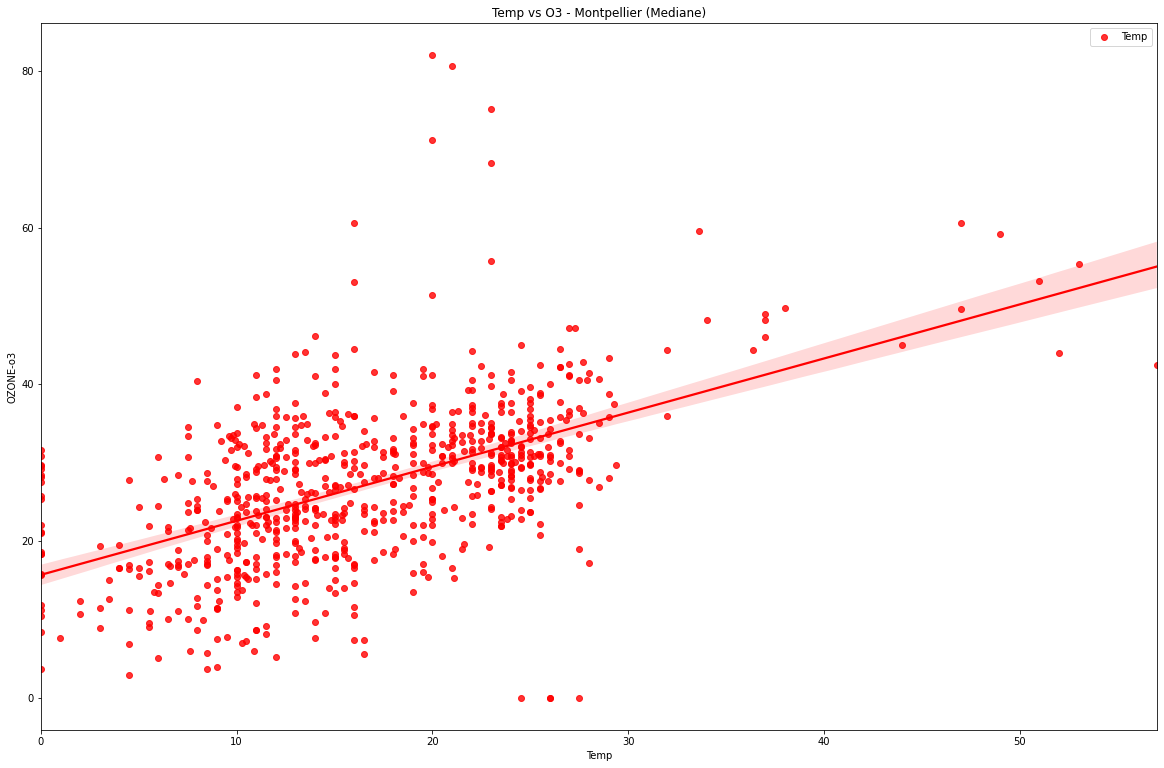

In [ ]:
fig,ax= plt.subplots(figsize=(20,13))
sns.regplot(df_merg_median['temperature'],df_merg_median['o3'], label='Temp',color ='r')
#sns.regplot(df_merg_median['pm25'],df_merg_median['o3'], label='pm10')
ax.set_title('Temp vs O3 - Montpellier (Mediane)')
ax.set_xlabel('Temp')
ax.set_ylabel('OZONE-o3')
ax.legend()
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



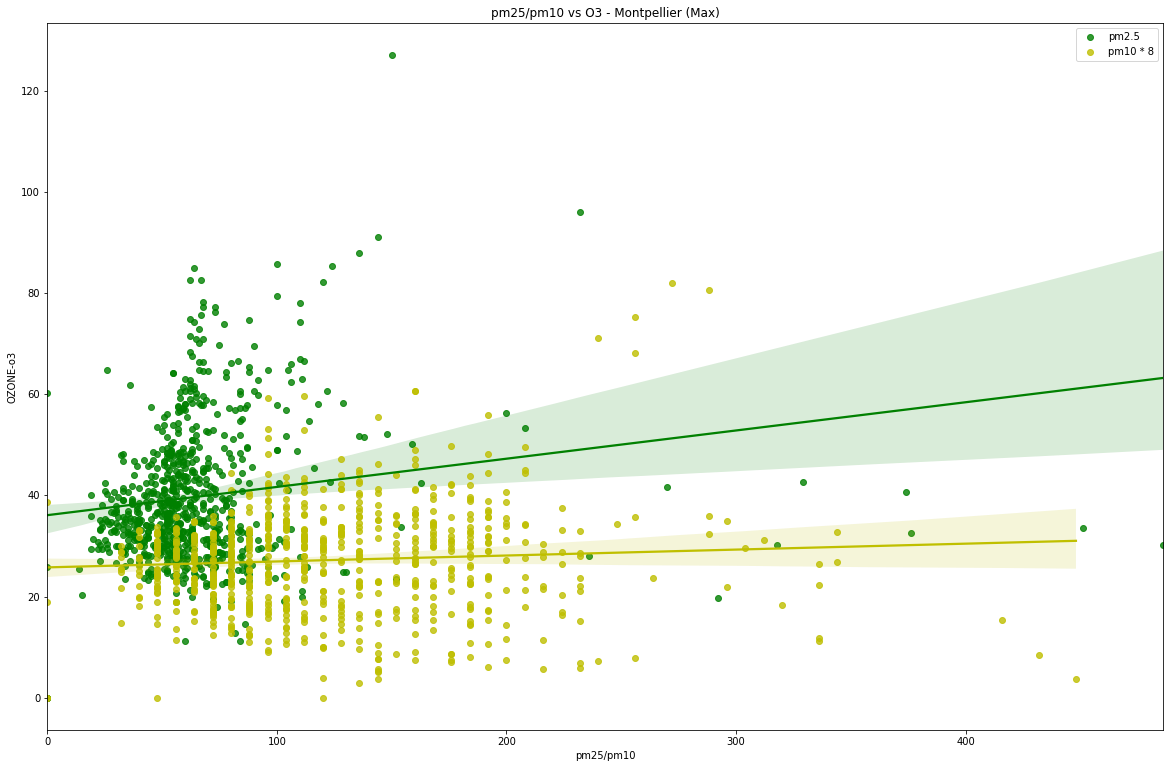

In [ ]:
fig,ax= plt.subplots(figsize=(20,13))
sns.regplot(df_merg_max['pm25'],df_merg_max['o3'], label='pm2.5',color ='g')
sns.regplot(df_merg_median['pm10']*8,df_merg_median['o3'], label='pm10 * 8',color ='y')
ax.set_title('pm25/pm10 vs O3 - Montpellier (Max)')
ax.set_xlabel('pm25/pm10')
ax.set_ylabel('OZONE-o3')
ax.legend()
fig.show()

## Mitz


In [ ]:
df_Met = df.loc[df['City']=='Metz']
df_Met

,Date,City,Specie,count,min,max,median,variance
24,2019-07-01,Metz,so2,41,0.1,1.4,0.1,1.70
114,2019-07-01,Metz,pm25,144,25.0,56.0,46.0,1164.13
141,2019-07-01,Metz,temperature,144,17.6,26.6,21.6,80.73
170,2019-07-01,Metz,no2,138,0.9,20.8,2.7,133.55
180,2019-07-01,Metz,humidity,144,38.7,83.4,70.1,2354.01
...,...,...,...,...,...,...,...,...
206256,2021-07-27,Metz,pm25,44,17.0,38.0,25.0,419.45
206267,2021-07-27,Metz,wind gust,4,3.0,3.6,3.6,0.90
206270,2021-07-27,Metz,o3,41,7.8,25.2,21.2,273.19
206309,2021-07-27,Metz,wind speed,14,0.3,5.1,2.8,26.77


In [ ]:
fig = px.pie(df_Met, values='count', names='Specie', title='Count of Species - Metz')
fig.show()

In [ ]:
species = df_Met['Specie'].values
species = np.unique(species)
for specie in species :
#specie = 'pressure'
    df_MonWind = df_Met.loc[df_Met['Specie']== specie]

    fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Minimum values", "Maximum Value", "Variance", "Median")) 
    fig.add_trace( go.Scatter(x=df_MonWind['Date'],y=df_MonWind['min'], name="Minimum values of "+specie ), row=1, col=1) 
    fig.add_trace( go.Scatter(x=df_MonWind['Date'],y=df_MonWind['max'],name="Maximum values of "+specie), row=1, col=2 ) 
    fig.add_trace( go.Scatter(x=df_MonWind['Date'],y=df_MonWind['variance'],name="Variance of "+specie+" Values" ), row=2, col=1 ) 
    fig.add_trace( go.Scatter(x=df_MonWind['Date'],y=df_MonWind['median'],name="Median of "+specie+" values" ), row=2, col=2 ) 

    #fig.update_xaxes(title_text="minimum value", row=1, col=1)
    fig.update_layout(height=600, width=1200, title_text=specie+" Over Time - Metz") 

    fig.show() 

In [ ]:
df_Met['avg'] = (df_Met['max']+df_Met['min'])/ 2
df_merg_max = data_merged('max',df_Met)
df_merg_min = data_merged('min',df_Met)
df_merg_median = data_merged('median',df_Met)
df_merg_avg = data_merged('avg',df_Met)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



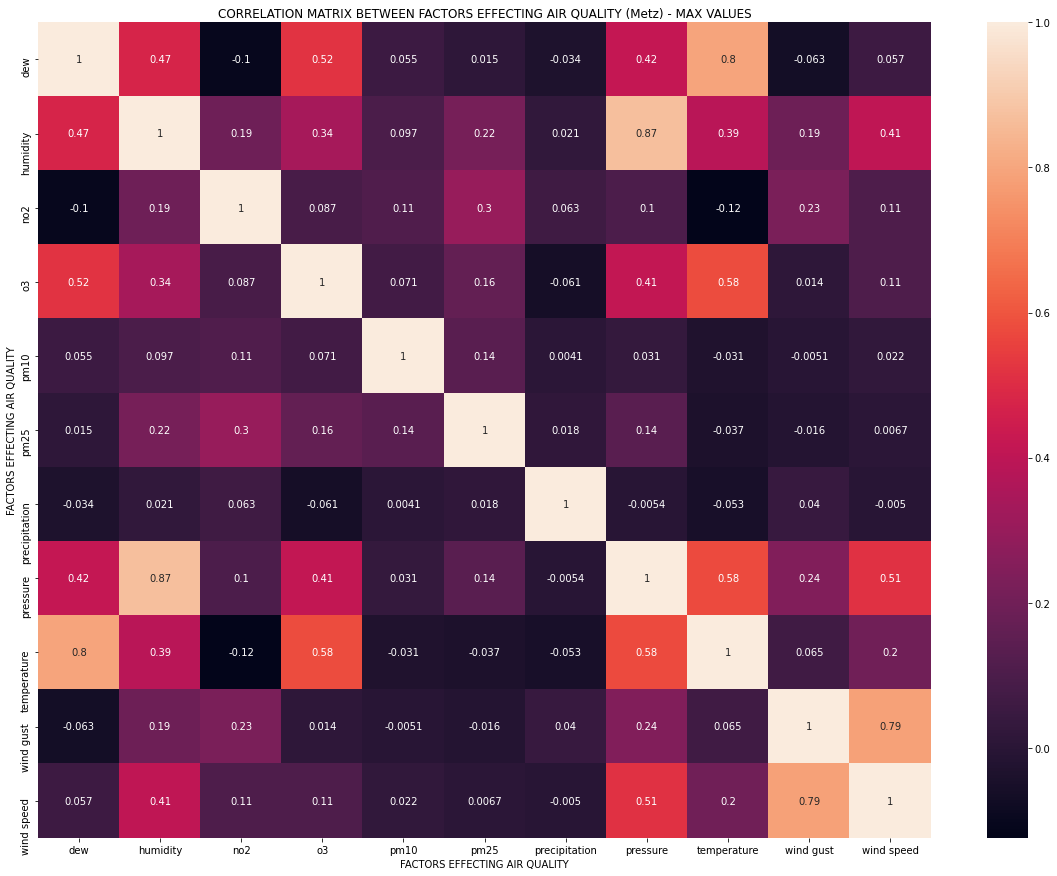

In [ ]:
correlation_matrix=df_merg_max.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_matrix,annot=True)
plt.title("CORRELATION MATRIX BETWEEN FACTORS EFFECTING AIR QUALITY (Metz) - MAX VALUES")
plt.xlabel("FACTORS EFFECTING AIR QUALITY")
plt.ylabel("FACTORS EFFECTING AIR QUALITY")
plt.show()

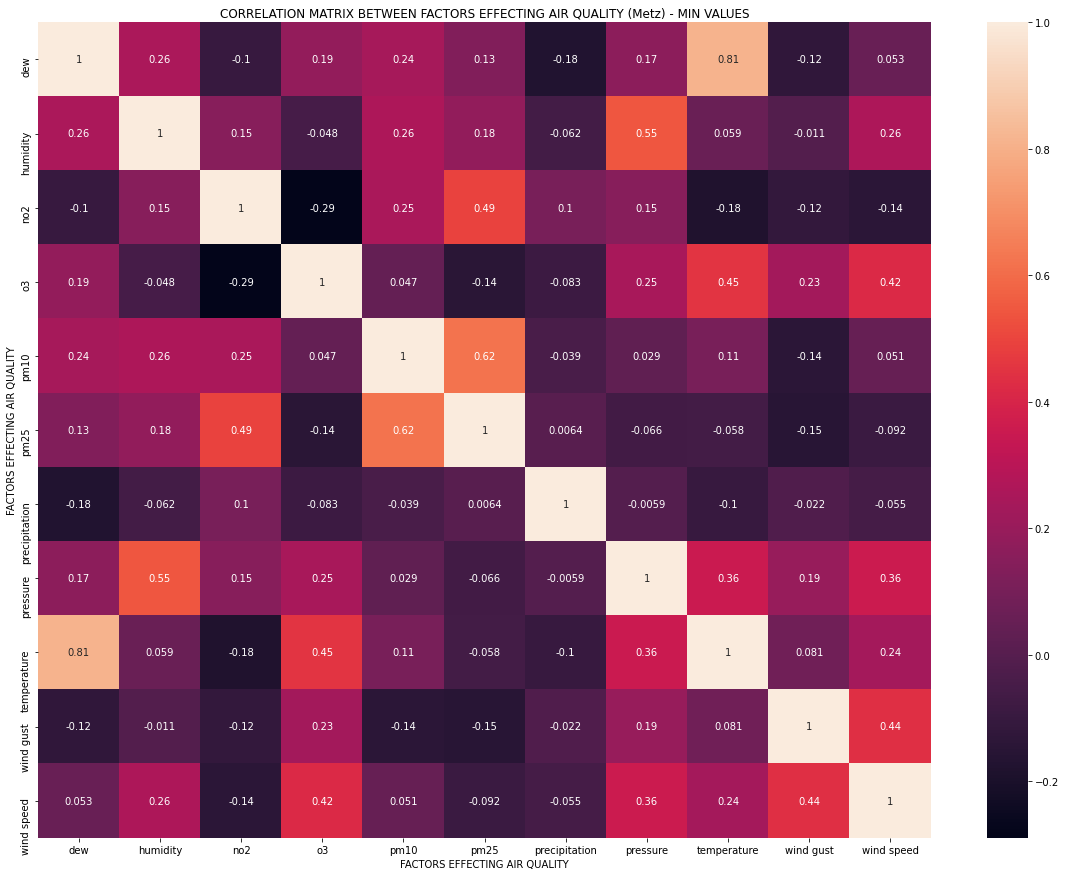

In [ ]:
correlation_matrix=df_merg_min.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_matrix,annot=True)
plt.title("CORRELATION MATRIX BETWEEN FACTORS EFFECTING AIR QUALITY (Metz) - MIN VALUES")
plt.xlabel("FACTORS EFFECTING AIR QUALITY")
plt.ylabel("FACTORS EFFECTING AIR QUALITY")
plt.show()

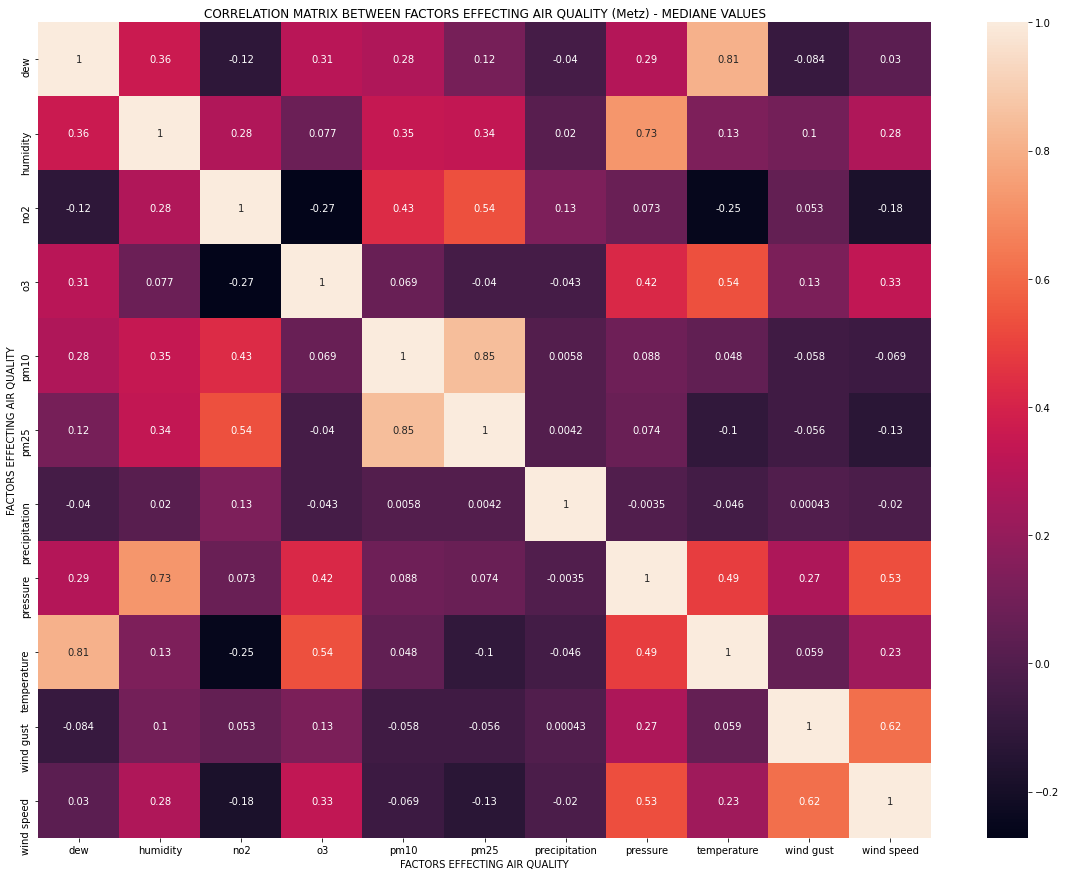

In [ ]:
correlation_matrix=df_merg_median.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_matrix,annot=True)
plt.title("CORRELATION MATRIX BETWEEN FACTORS EFFECTING AIR QUALITY (Metz) - MEDIANE VALUES")
plt.xlabel("FACTORS EFFECTING AIR QUALITY")
plt.ylabel("FACTORS EFFECTING AIR QUALITY")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



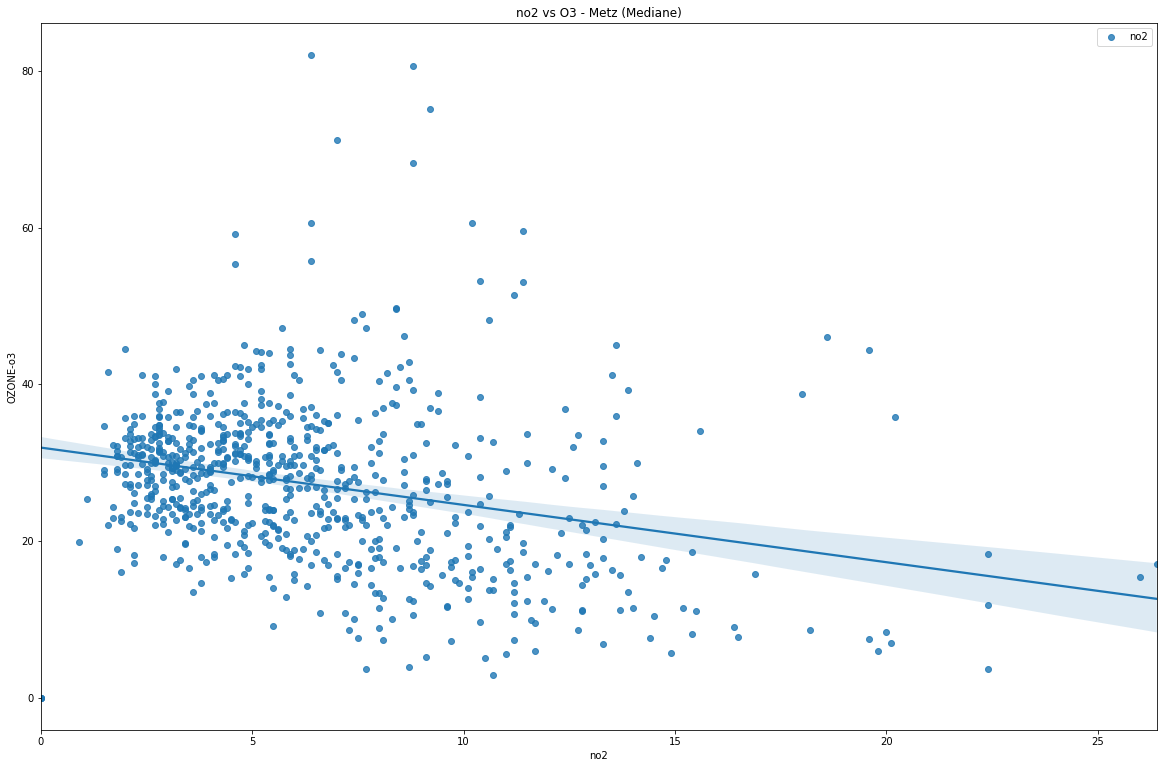

In [ ]:
fig,ax= plt.subplots(figsize=(20,13))
sns.regplot(df_merg_median['no2'],df_merg_median['o3'], label='no2')
#sns.regplot(df_merg_median['pm25'],df_merg_median['o3'], label='pm10')
ax.set_title('no2 vs O3 - Metz (Mediane)')
ax.set_xlabel('no2')
ax.set_ylabel('OZONE-o3')
ax.legend()
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



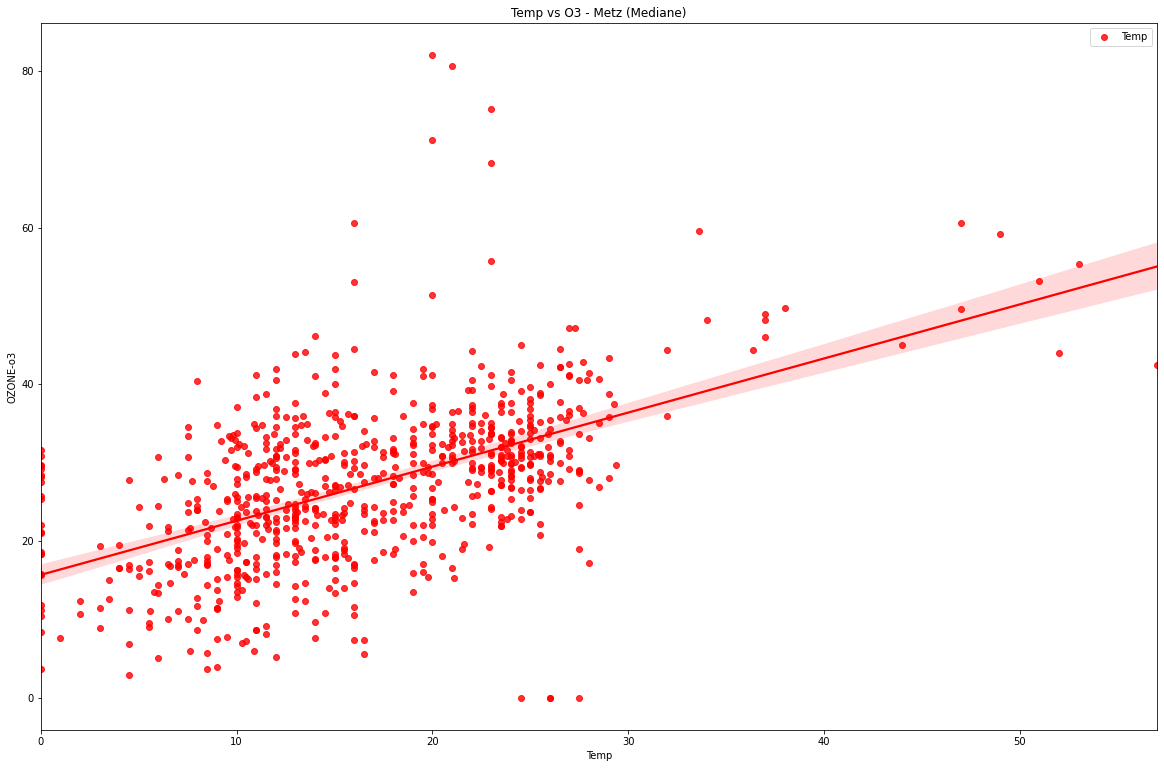

In [ ]:
fig,ax= plt.subplots(figsize=(20,13))
sns.regplot(df_merg_median['temperature'],df_merg_median['o3'], label='Temp',color ='r')
#sns.regplot(df_merg_median['pm25'],df_merg_median['o3'], label='pm10')
ax.set_title('Temp vs O3 - Metz (Mediane)')
ax.set_xlabel('Temp')
ax.set_ylabel('OZONE-o3')
ax.legend()
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



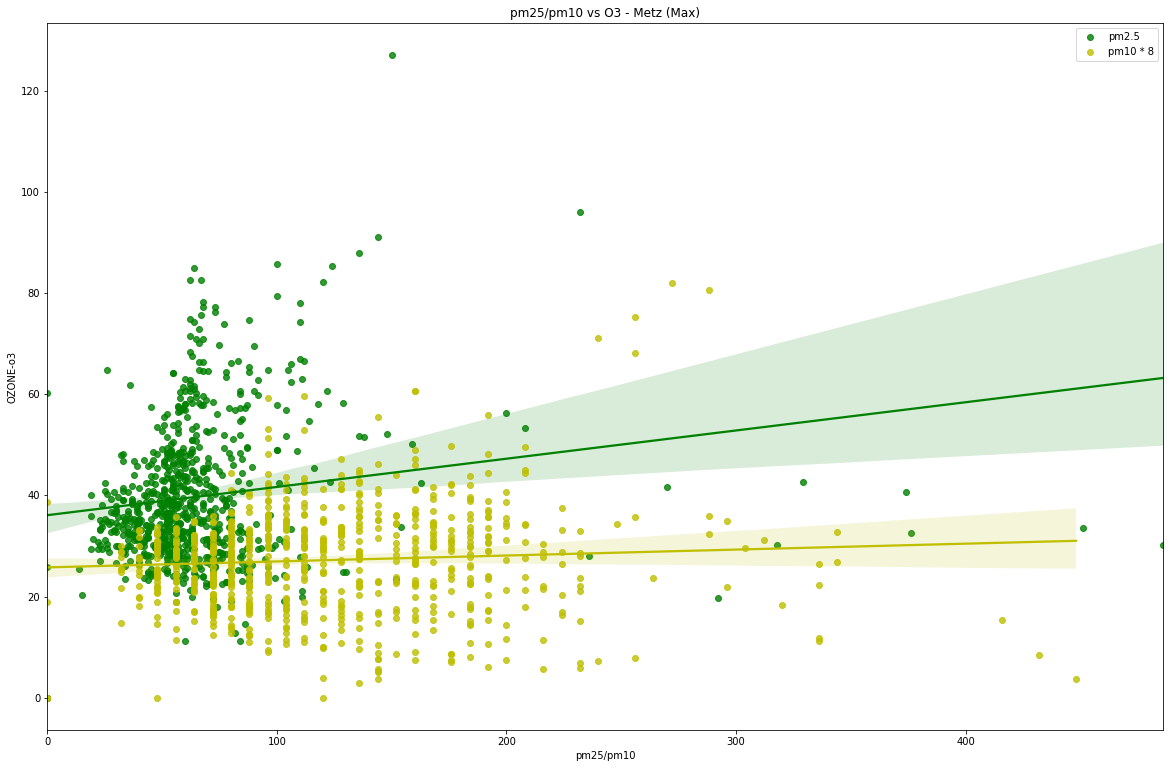

In [ ]:
fig,ax= plt.subplots(figsize=(20,13))
sns.regplot(df_merg_max['pm25'],df_merg_max['o3'], label='pm2.5',color ='g')
sns.regplot(df_merg_median['pm10']*8,df_merg_median['o3'], label='pm10 * 8',color ='y')
ax.set_title('pm25/pm10 vs O3 - Metz (Max)')
ax.set_xlabel('pm25/pm10')
ax.set_ylabel('OZONE-o3')
ax.legend()
fig.show()

## Montpellier vs Metz

In [ ]:
df_o3 = df.loc[df['Specie']=='o3']
df_temp = df.loc[df['Specie']=='temperature']

df_o3.head()

,Date,City,Specie,count,min,max,median,variance
70,2019-07-01,Montpellier,o3,75,18.1,59.8,30.8,746.43
186,2019-07-01,Metz,o3,144,18.0,35.9,28.8,305.79
461,2019-07-02,Metz,o3,144,23.3,48.1,37.5,682.86
469,2019-07-02,Montpellier,o3,92,6.4,73.9,36.3,1934.78
623,2019-07-03,Montpellier,o3,88,30.0,82.6,47.2,1211.37


In [ ]:
fig = px.line(df_o3, x="Date", y="max", color='City')
fig.update_layout( # customize font and legend orientation & position
    font_family="Rockwell",
    title = "max O3 rate Over Time ",
    legend=dict(
        orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"
    )
)
fig.show()

fig1 = px.line(df_temp, x="Date", y="max", color='City')
fig1.update_layout( # customize font and legend orientation & position
    font_family="Rockwell",
    title = "max Temperature degree Over Time ",
    legend=dict(
        orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"
    )
)
fig1.show()

In [ ]:
df_temp = df.loc[df['Specie']=='temperature']
#df_o3.head()